In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
from typing import List

In [2]:
house_df = pd.read_csv("complete_houses_mod.csv")
house_df.columns

Index(['Unnamed: 0', 'id', 'Zip', 'Price', 'Price of square meter',
       'Living area', 'Number of rooms', 'Garden surface', 'Terrace surface',
       'Open fire', 'Surface of the land', 'Number of facades',
       'Swimming pool', 'Building Cond. values', 'Kitchen values',
       'Primary energy consumption', 'Energy efficiency'],
      dtype='object')

In [3]:
# # Remove outliers
# def remove_outliers(house_df: pd.DataFrame, columns: List[str], n_std: int) -> pd.DataFrame:
#     for col in columns:
#         print('Working on column: {}'.format(col))
        
#         mean = house_df[col].mean()
#         sd = house_df[col].std()
        
#         house_df = house_df[(house_df[col] <= mean+(n_std*sd))]
        
#     return house_df

# no_outliers_df = remove_outliers(house_df, ['Number of rooms', 
# 'Living area', 'Surface of the land', 'Terrace surface','Garden surface'], 3)

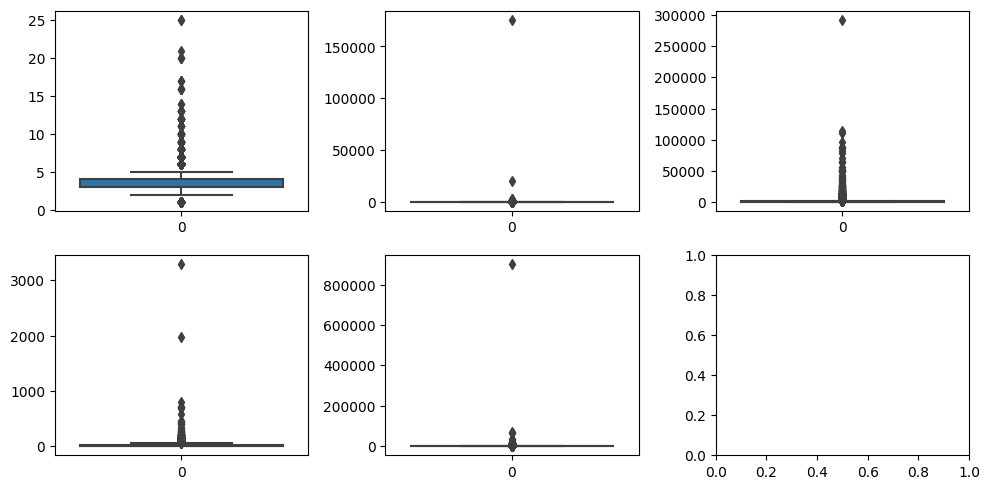

In [4]:
# def detectOutliersHouseDf():
#     fig, axs = plt.subplots(2,3, figsize = (10,5))
#     plt1 = sns.boxplot(house_df['Number of rooms'], ax = axs[0,0])
#     plt2 = sns.boxplot(house_df['Living area'], ax = axs[0,1])
#     plt3 = sns.boxplot(house_df['Surface of the land'], ax = axs[0,2])
#     plt1 = sns.boxplot(house_df['Terrace surface'], ax = axs[1,0])
#     plt2 = sns.boxplot(house_df['Garden surface'], ax = axs[1,1])
#     # plt3 = sns.boxplot(house_df['parking'], ax = axs[1,2])
#     plt.tight_layout()

# detectOutliersHouseDf()

In [5]:
# Remove outliers
def remove_outliers(house_df: pd.DataFrame, columns: List[str], n_std: int) -> pd.DataFrame:
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = house_df[col].mean()
        sd = house_df[col].std()
        
        house_df = house_df[(house_df[col] <= mean+(n_std*sd))]
        
    return house_df

no_outliers_df = remove_outliers(house_df, ['Number of rooms','Living area', 'Surface of the land', 'Terrace surface','Garden surface'], 3)

Working on column: Number of rooms
Working on column: Living area
Working on column: Surface of the land
Working on column: Terrace surface
Working on column: Garden surface


In [6]:
# no_outliers_df.isnull().sum()

Unnamed: 0                    0
id                            0
Zip                           0
Price                         0
Price of square meter         0
Living area                   0
Number of rooms               0
Garden surface                0
Terrace surface               0
Open fire                     0
Surface of the land           0
Number of facades             0
Swimming pool                 0
Building Cond. values         0
Kitchen values                0
Primary energy consumption    0
Energy efficiency             0
dtype: int64

In [7]:
X = no_outliers_df

y = no_outliers_df['Price']

In [8]:
try:
    X.drop(["Unnamed: 0", "id", "Price of square meter", 'Price'], axis=1, inplace=True)
except KeyError:
    pass
X.columns

Index(['Zip', 'Living area', 'Number of rooms', 'Garden surface',
       'Terrace surface', 'Open fire', 'Surface of the land',
       'Number of facades', 'Swimming pool', 'Building Cond. values',
       'Kitchen values', 'Primary energy consumption', 'Energy efficiency'],
      dtype='object')

In [9]:
y

0       349000
1       625000
2       149000
3       335000
4       545000
         ...  
9339    382230
9340    382484
9341    384070
9342    406000
9343    428500
Name: Price, Length: 9097, dtype: int64

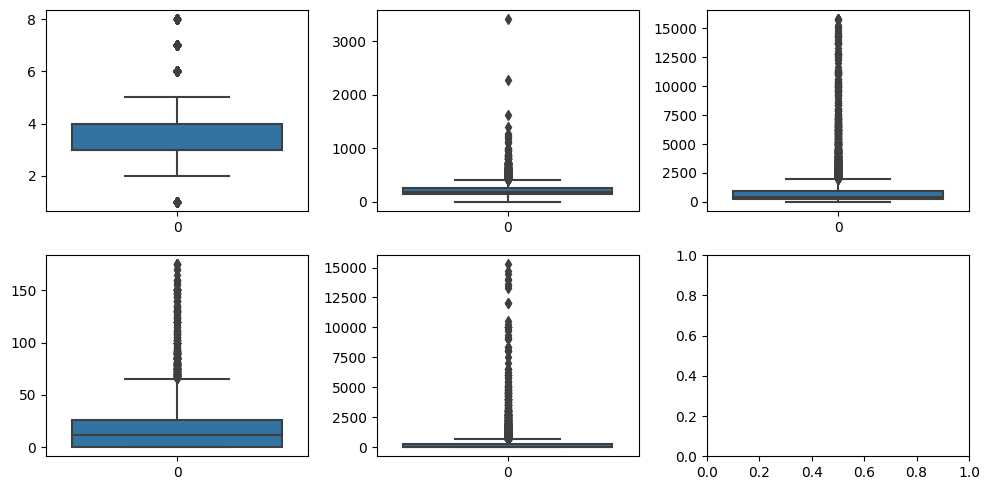

In [10]:
def detectOutliers():
    fig, axs = plt.subplots(2,3, figsize = (10,5))
    plt1 = sns.boxplot(no_outliers_df['Number of rooms'], ax = axs[0,0])
    plt2 = sns.boxplot(no_outliers_df['Living area'], ax = axs[0,1])
    plt3 = sns.boxplot(no_outliers_df['Surface of the land'], ax = axs[0,2])
    plt1 = sns.boxplot(no_outliers_df['Terrace surface'], ax = axs[1,0])
    plt2 = sns.boxplot(no_outliers_df['Garden surface'], ax = axs[1,1])
    # plt3 = sns.boxplot(no_outliers_df['parking'], ax = axs[1,2])
    plt.tight_layout()

detectOutliers()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [12]:
X_train.shape

(7277, 13)

In [13]:
X.shape

(9097, 13)

In [14]:
lm = LinearRegression() 

lm.fit(X_train,y_train)

LinearRegression()

In [15]:
# Now let’s evaluate the model by checking out its coefficients 
# and how we can interpret them.
print(lm.intercept_)

coeff_df = pd.DataFrame(lm.coef_,X.columns,columns = ['Coefficient'])

coeff_df

-237216.94737520005


,Coefficient
Zip,-21.901082
Living area,1158.589519
Number of rooms,37925.145281
Garden surface,-11.775493
Terrace surface,46.432291
Open fire,43980.221751
Surface of the land,30.766941
Number of facades,23336.332982
Swimming pool,178763.599471
Building Cond. values,45375.840426


In [16]:

# Expected kind of output : 

# Avg. Area Income : 21.528
# Avg. Area House Age : 164883.28
# Avg. Area Number of Rooms : 122368.67
# Avg. Area Number of Bedrooms : 2233.80
# Area Population : 15.15

# What does coefficient of data says:

#     Holding all other features fixed, a 1 unit increase in Avg. Area Income 
#     is associated with an increase of $21.52 .
#     Holding all other features fixed, a 1 unit increase in Avg. Area House Age 
#     is associated with an increase of $164883.28 .
#     Holding all other features fixed, a 1 unit increase in Avg. Area Number of Rooms 
#     is associated with an increase of $122368.67 .
#     Holding all other features fixed, a 1 unit increase in Avg. Area Number of Bedrooms 
#     is associated with an increase of $2233.80 .
#     Holding all other features fixed, a 1 unit increase in Area Population 
#     is associated with an increase of $15.15 .


In [17]:
predictions = lm.predict(X_test)

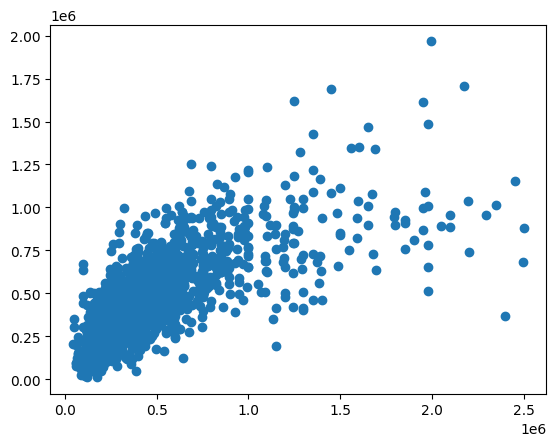

In [18]:
plt.scatter(y_test,predictions)
# Good prediction would appear as a line.

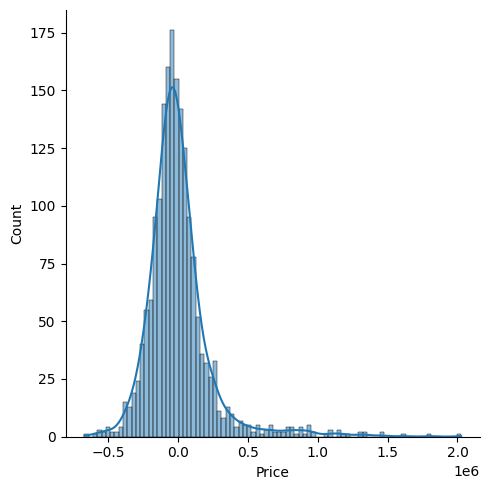

In [19]:
sns.displot((y_test-predictions), kde=True)
# If the data is displayed in a bell shape, we did well

In [20]:
print("true ", y_test.shape)
print("pred ", predictions.shape)

true  (1820,)
pred  (1820,)


In [21]:
print('MAE:', metrics.mean_absolute_error(predictions, y_test))
print("r2 score ", metrics.r2_score(predictions, y_test))
print('MSE:', metrics.mean_squared_error(predictions, y_test)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions))) 

MAE: 149738.77191710248
r2 score  0.002348535388256412
MSE: 57150501541.69653
RMSE: 239061.71073950035
